# Exercise on low momentum electrons

## Identifying electrons in CMS

<img src="Pics/CMS_cross_section.png" alt="CMS cross section" width="800" height="400">

As electrons travel through CMS, they follow a curved trajectory due to the 3.8 T magnetic field produced by the solenoid. Electrons create hits in the scilicon tracker (pixel and strip trackers) and deposit energy in the electromagnetic calorimeter (ECAL), which is composed of lead tungstate crystals. Tracking information is used to measure the momentum of electrons, as lower momentum electrons will follow a more curved trajectory, while higher momentum electrons will follow a straighter trajectory. Energy deposits in ECAL are used to measure the energy of electrons.

## Comparing the Z boson and the J/psi meson

<img src="Pics/dielectron_mass_with_arrows.png" alt="dielectron mass with arrows" width="800" height="400">

The Z boson can decay directly to an electron-positron pair, and the J/psi meson (composed of a charm quark and a charm antiquark) can decay to an electron-positron pair through a photon mediator. However, the Z boson (mass of 91.2 GeV) is much more massive than the J/psi meson (mass of 3.1 GeV). This means that in the rest frame of the decaying particle (center-of-momentum frame), electrons decaying from a Z boson will have a much larger momentum (approx. 45.6 GeV) compared to electrons decaying from a J/psi meson (approx. 1.6 GeV).

In the rest frame of the CMS detector, the electron decay will not necessarily be fully transverse, so only a fraction of the momentum will be in the transverse direction. In addition, the Z boson or J/psi meson likely have some momentum (some amount of boost) that also contributes to the momenta of electrons.

## Electron tag and probe using J/psi meson decays

| ![Z to EE](Pics/ZToEE.png) | ![J/psi to EE](Pics/JPsiToEE.png) |
|----------------------------|-----------------------------------|

<img src="Pics/CMS_JPsi.png" alt="CMS J/psi" width="800" height="400">


In [2]:
import uproot
from glob import glob
base_directory = '/eos/user/c/cmsdas/2024/short-ex-egm/datasets/'
dyfiles = sorted(glob(f'{base_directory}DYto2L-2Jets_MLL-50_TuneCP5_13p6TeV-amcatnloFXFX-pythia8/*.root'))
datafiles = sorted(glob(f'{base_directory}EGamma1_Run2023C/*.root'))
file = uproot.open(dyfiles[0])
dict(file)

{'tag;1': <TObjString 'untagged' at 0x7f38a8d363c0>,
 'Events;1': <TTree 'Events' (1782 branches) at 0x7f383341c4c0>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (6 branches) at 0x7f383341c520>,
 'Runs;1': <TTree 'Runs' (10 branches) at 0x7f383341c610>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7f383341c760>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7f388f96e760>}

In [3]:
from coffea.nanoevents import NanoEventsFactory

dyevents = NanoEventsFactory.from_root(dyfiles[0]).events()
dataevents = NanoEventsFactory.from_root(datafiles[0]).events()

In [16]:
# Electron collection: slimmedElectrons after basic selection (pt > 5)
print(dyevents.Electron)
# LowPtElectron collection: slimmedLowPtElectrons after basic selection (pt > 1. && electronID('ID') > -0.25)
print(dyevents.LowPtElectron)

[[], [Electron], [], [], [], [], ... [], [], [Electron, Electron], [], [], []]
[[{convVeto: True, convWP: 0, lostHits: 0, ... genPartFlav: 0, genPartIdx: -1}]]


In [18]:
# Electron collection variables:
dyevents.Electron.fields

['seediEtaOriX',
 'convVeto',
 'cutBased',
 'cutBased_HEEP',
 'isPFcand',
 'jetNDauCharged',
 'lostHits',
 'mvaIso_WP80',
 'mvaIso_WP90',
 'mvaNoIso_WP80',
 'mvaNoIso_WP90',
 'seedGain',
 'tightCharge',
 'jetIdx',
 'photonIdx',
 'svIdx',
 'fsrPhotonIdx',
 'charge',
 'pdgId',
 'seediPhiOriY',
 'vidNestedWPBitmap',
 'vidNestedWPBitmapHEEP',
 'deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dr03TkSumPtHEEP',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaHZZIso',
 'mvaIso',
 'mvaNoIso',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'pt',
 'r9',
 'scEtOverPt',
 'sieie',
 'sip3d',
 'mvaTTH',
 'genPartFlav',
 'genPartIdx',
 'genPartIdxG',
 'jetIdxG',
 'photonIdxG']

In [19]:
# LowPtElectron collection variables:
dyevents.LowPtElectron.fields

['convVeto',
 'convWP',
 'lostHits',
 'electronIdx',
 'photonIdx',
 'charge',
 'pdgId',
 'ID',
 'convVtxRadius',
 'deltaEtaSC',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'phi',
 'pt',
 'ptbiased',
 'r9',
 'scEtOverPt',
 'sieie',
 'unbiased',
 'genPartFlav',
 'genPartIdx']

In [24]:
# Electron ID (cut based):
dyevents.Electron.cutBased.__doc__

'cut-based ID RunIII Winter22 (0:fail, 1:veto, 2:loose, 3:medium, 4:tight)'

In [25]:
# LowPtElectron ID (BDT raw score):
dyevents.LowPtElectron.ID.__doc__

'ID, BDT (raw) score'

In [29]:
# import awkward and numpy
import awkward as ak
import numpy as np

# import and set up plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import mplhep
mplhep.style.use(mplhep.style.CMS)

In [30]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

(array([    0.,     0.,     0.,     0.,     0., 34074., 24554., 19037.,
        15490., 13321., 11998., 11170., 10120.,  9765.,  9413.,  9270.,
         8980.,  8993.,  9219.,  9115.,  9229.,  9324.,  9612.,  9553.,
         9730.,  9804.,  9879., 10051., 10288., 10366., 10467., 10860.,
        10899., 10898., 10972., 11143., 11422., 11459., 11661., 11712.,
        12001., 11871., 11903., 11573., 10915., 10224.,  8993.,  8112.,
         6805.,  5974.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 artists>)

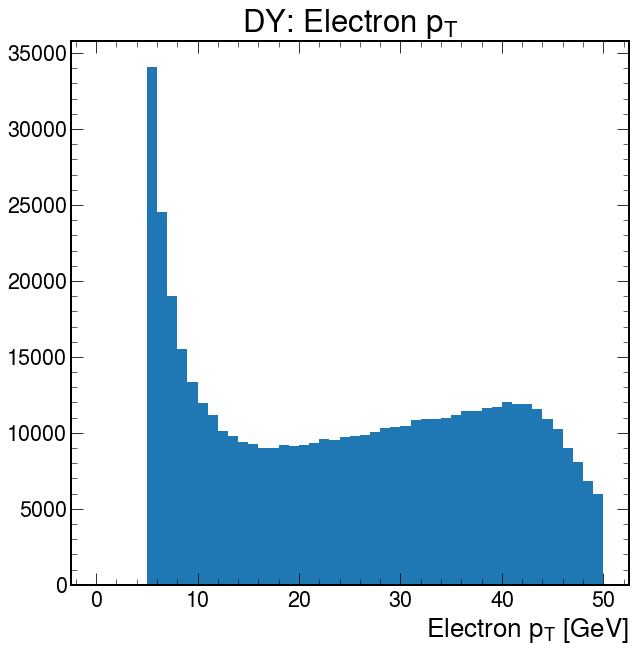

In [54]:
# Electron pT
fig, ax = plt.subplots()
ax.set_title(r'DY: Electron $p_{T}$')
ax.set_xlabel(r'Electron $p_{T}$ [GeV]')
ax.hist(ak.flatten(dyevents.Electron.pt), bins = np.linspace(0, 50, 51))

(array([     0.,  54387., 105873.,  52187.,  28170.,  17593.,  13100.,
         10855.,   9341.,   8772.,   8301.,   8128.,   7882.,   8015.,
          8098.,   8279.,   8435.,   8815.,   9422.,   9815.,  10089.,
         10070.,  10213.,   9737.,   9772.,  10024.,  10133.,  10665.,
         10699.,  10989.,  11475.,  11777.,  12257.,  12308.,  12561.,
         12506.,  12532.,  12410.,  12104.,  11935.,  11303.,  10883.,
         10035.,   8746.,   7527.,   6382.,   5656.,   4820.,   4088.,
          3614.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 artists>)

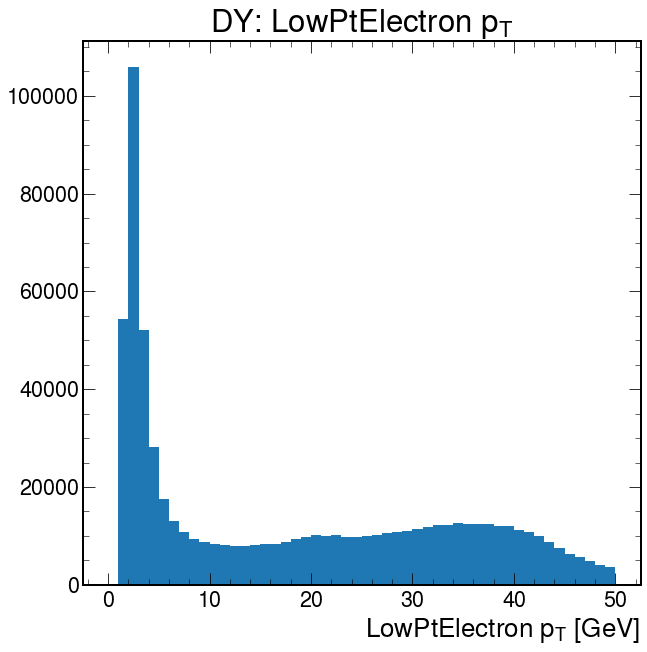

In [55]:
# LowPtElectron pT
fig, ax = plt.subplots()
ax.set_title(r'DY: LowPtElectron $p_{T}$')
ax.set_xlabel(r'LowPtElectron $p_{T}$ [GeV]')
ax.hist(ak.flatten(dyevents.LowPtElectron.pt), bins = np.linspace(0, 50, 51))

In [56]:
np.linspace(0, 50, 51)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])